In [2]:
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime as datetime
from datetime import date
warnings.filterwarnings("ignore")

In [3]:
drivers = "../Resources/drivers.csv"
races = "../Resources/races.csv"
driver_standings = "../Resources/driver_standings.csv"
constructor_results = "../Resources/constructor_results.csv"
constructor_standings = "../Resources/constructor_standings.csv"
lap_times = "../Resources/lap_times.csv"
pit_stops = "../Resources/pit_stops.csv"
qualifying = "../Resources/qualifying.csv"
status = "../Resources/status.csv"
results = "../Resources/results.csv"
constructors = "../Resources/constructors.csv"

drivers_df = pd.read_csv(drivers)
races_df = pd.read_csv(races)
driver_standings_df= pd.read_csv(driver_standings)
constructor_results_df = pd.read_csv(constructor_results)
constructor_standings_df = pd.read_csv(constructor_standings)
lap_times_df = pd.read_csv(lap_times)
pit_stops_df = pd.read_csv(pit_stops)
qualifying_df = pd.read_csv(qualifying)
status_df = pd.read_csv(status)
results_df = pd.read_csv(results)
constructors_df = pd.read_csv(constructors)

In [4]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
drivers_df['dob'] = pd.to_datetime(drivers_df.dob)

In [6]:
drivers_df['DOB1'] = drivers_df['dob'].dt.strftime('%m/%d/%Y')
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,DOB1
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,01/07/1985
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,05/10/1977
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,06/27/1985
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,07/29/1981
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,10/19/1981


In [7]:
def calculate_age(born):
        born = datetime.datetime.strptime(born, "%m/%d/%Y").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [22]:
drivers_df['fullName'] = drivers_df['forename'] +" "+ drivers_df['surname']
age_results = pd.merge(results_df, drivers_df, on='driverId', how='inner')

df1 = age_results[['raceId', 
                   'driverId', 
                   'constructorId', 
                   'positionOrder', 
                   'points', 
                   'DOB1', 
                   'nationality', 
                   'fullName']].copy()
race_data = pd.merge(df1, races_df, on='raceId', how='inner')

df2 = race_data[['raceId', 
                 'driverId', 
                 'constructorId', 
                 'positionOrder', 
                 'points', 
                 'DOB1', 
                 'nationality', 
                 'fullName', 
                 'year', 
                 'name']].copy()
constructor_data = pd.merge(df2, constructors_df, on='constructorId', how='inner')

df3 = constructor_data [['positionOrder', 
                         'points', 
                         'DOB1', 
                         'nationality_x', 
                         'fullName', 
                         'year', 
                         'name_x', 
                         'name_y', 
                         'nationality_y']].copy()

df4 = df3.rename(columns={'positionOrder': 'Position',
                          'points': 'Points',
                          'DOB1': 'DOB', 
                          'nationality_x': 'Driver_Nationality', 
                          'fullName': 'Driver_Name', 
                          'year': 'Race_Year', 
                          'name_x': 'Race_Name', 
                          'name_y': 'Contractor', 
                          'nationality_y': 'Contractor_Nationality'})

clean_data = df4[df4["Race_Year"] >=2007]
clean_data['Age'] = clean_data['DOB'].apply(calculate_age)

clean_data.head(109)

,Position,Points,DOB,Driver_Nationality,Driver_Name,Race_Year,Race_Name,Contractor,Contractor_Nationality,Age
0,1,10.0,01/07/1985,British,Lewis Hamilton,2008,Australian Grand Prix,McLaren,British,35
1,5,4.0,10/19/1981,Finnish,Heikki Kovalainen,2008,Australian Grand Prix,McLaren,British,39
2,5,4.0,01/07/1985,British,Lewis Hamilton,2008,Malaysian Grand Prix,McLaren,British,35
3,3,6.0,10/19/1981,Finnish,Heikki Kovalainen,2008,Malaysian Grand Prix,McLaren,British,39
4,13,0.0,01/07/1985,British,Lewis Hamilton,2008,Bahrain Grand Prix,McLaren,British,35
...,...,...,...,...,...,...,...,...,...,...
104,3,15.0,01/07/1985,British,Lewis Hamilton,2010,Bahrain Grand Prix,McLaren,British,35
105,7,6.0,01/19/1980,British,Jenson Button,2010,Bahrain Grand Prix,McLaren,British,40
106,6,8.0,01/07/1985,British,Lewis Hamilton,2010,Australian Grand Prix,McLaren,British,35
107,1,25.0,01/19/1980,British,Jenson Button,2010,Australian Grand Prix,McLaren,British,40


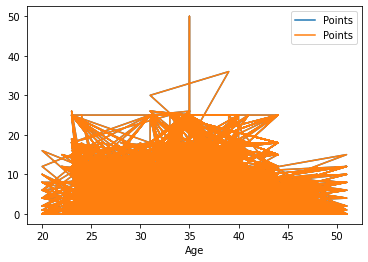

In [20]:
ax = clean_data.plot('Age', 'Points')
clean_data.plot('Age', 'Points', ax = ax)

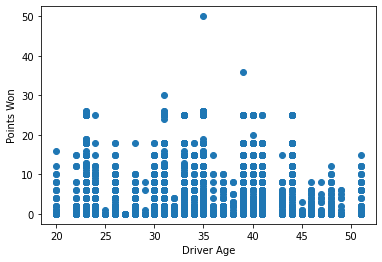

In [19]:
x_values = clean_data['Age']
y_values = clean_data['Points']
plt.scatter(x_values,y_values)
plt.xlabel('Driver Age')
plt.ylabel('Points Won')
plt.show()

In [10]:
age = pd.merge(drivers_df, results_df, on="driverId", how="inner")
age2 = age.drop(columns=['url'])
age2.head(261)

,driverId,driverRef,number_x,code,forename,surname,dob,nationality,DOB1,fullName,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,1,25.0,44,1:24:08.761,5048761,28,2,1:47.758,233.990,1
257,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,7,7.0,53,+17.245,6443301,34,1,1:22.746,252.033,1
258,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,1,26.0,59,2:19:35.060,8375060,58,1,1:18.833,239.518,1
259,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,3,15.0,53,+22.729,5663093,48,7,1:38.075,214.660,1


In [11]:
age_races = pd.merge(age2, races_df, on="raceId", how="inner")
age_races2 = age_races.drop(columns=['url', 'date'])
age_races2.head()

,driverId,driverRef,number_x,code,forename,surname,dob,nationality,DOB1,fullName,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,time_y
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,01/07/1985,Lewis Hamilton,...,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,04:30:00
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,05/10/1977,Nick Heidfeld,...,41,3,1:27.739,217.586,1,2008,1,1,Australian Grand Prix,04:30:00
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,06/27/1985,Nico Rosberg,...,41,5,1:28.090,216.719,1,2008,1,1,Australian Grand Prix,04:30:00
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,07/29/1981,Fernando Alonso,...,58,7,1:28.603,215.464,1,2008,1,1,Australian Grand Prix,04:30:00
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,10/19/1981,Heikki Kovalainen,...,43,1,1:27.418,218.385,1,2008,1,1,Australian Grand Prix,04:30:00


In [13]:
#age_races2.info()

In [ ]:
# age_races3 = age_races2[['driverId', 'driverRef', 'code', 'forename', 'surname', 'dob', 'name', 'year', 'time_x', 'time_y']].copy()
# age_races4 = age_races3.rename(columns={'driverId': 'DriverID',
#                                         'driverRef': 'DriverRef',
#                                         'forename': 'First Name', 
#                                         'surname': 'Last Name', 
#                                         'dob': 'DOB', 
#                                         'name': 'Race', 
#                                         'year': 'Year', 
#                                         'time_x': 'Finish Time'})
# age_races4


In [14]:
best_driver = pd.merge(drivers_df, qualifying_df, on="driverId", how="inner")
best_driver

,driverId,driverRef,number_x,code,forename,surname,dob,nationality,url,DOB1,fullName,qualifyId,raceId,constructorId,number_y,position,q1,q2,q3
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,01/07/1985,Lewis Hamilton,1,18,1,22,1,1:26.572,1:25.187,1:26.714
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,01/07/1985,Lewis Hamilton,26,19,1,22,4,1:35.392,1:34.627,1:36.709
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,01/07/1985,Lewis Hamilton,47,20,1,22,3,1:32.750,1:31.922,1:33.292
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,01/07/1985,Lewis Hamilton,71,21,1,22,5,1:21.366,1:20.825,1:22.096
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,01/07/1985,Lewis Hamilton,91,22,1,22,3,1:26.192,1:26.477,1:27.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,849,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi,06/29/1995,Nicholas Latifi,8537,1038,3,6,20,1:21.717,\N,\N
8590,849,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi,06/29/1995,Nicholas Latifi,8556,1039,3,6,19,1:17.320,\N,\N
8591,849,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi,06/29/1995,Nicholas Latifi,8576,1040,3,6,19,1:35.066,\N,\N
8592,849,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi,06/29/1995,Nicholas Latifi,8595,1041,3,6,18,1:27.812,\N,\N


In [ ]:
pd.merge(constructor_results_df, constructor_standings_df, on="constructorId", how="outer")


In [ ]:
#def calculate_age(born):
        #born = datetime.datetime.strptime(born, "%m/%d/%Y").date()
        #today = date.today()
        #return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
        
#age = gb2
#age['age'] = age['dob'].apply(calculate_age)
#age['age_by_decade'] = pd.cut(x=age['age'], bins=[20,29,39,49,59,69,200], labels=['20s', '30s', '40s','50s','60s','70s +'])
#age['freq_age']=age.groupby(by='age_by_decade')['positionOrder'].transform('count').sort_values()
#age = age[age["freq"] >20 ]
#age2 = age.drop_duplicates(subset=['age_by_decade'])
#age2.dropna()
#age2.head()